# May, 14 (2023), UVic


In [22]:
#loading packages

from sklearn.decomposition import PCA
from sklearn.decomposition import PCA, KernelPCA
from matplotlib import pyplot as plt
import numpy as np

In [23]:
## Getting MNIST data 


##Defining Input and target and normalizing the input


from tensorflow.keras.datasets import mnist

(inp_tr, tar_tr), (inp_va, tar_va) = mnist.load_data()

inp_tr = np.reshape(inp_tr,(-1,784))
inp_va = np.reshape(inp_va,(-1,784))

c_noise=0

noise_tr=np.random.rand(60000,784)*c_noise
noise_va=np.random.rand(10000,784)*c_noise

inp_tr= inp_tr/255.
inp_va= inp_va/255.

inp_tr=(inp_tr+noise_tr)/(1+c_noise)
inp_va=(inp_va+noise_va)/(1+c_noise)

print(np.shape(inp_tr),np.shape(inp_va))

(60000, 784) (10000, 784)


In [24]:
# ## adding noise

# noise_tr=np.random.rand(60000,784)
# noise_va=np.random.rand(10000,784)

# inp_tr= inp_tr+noise_tr
# inp_va= inp_va+noise_va

# np.shape(noise_tr)

<Figure size 640x480 with 0 Axes>

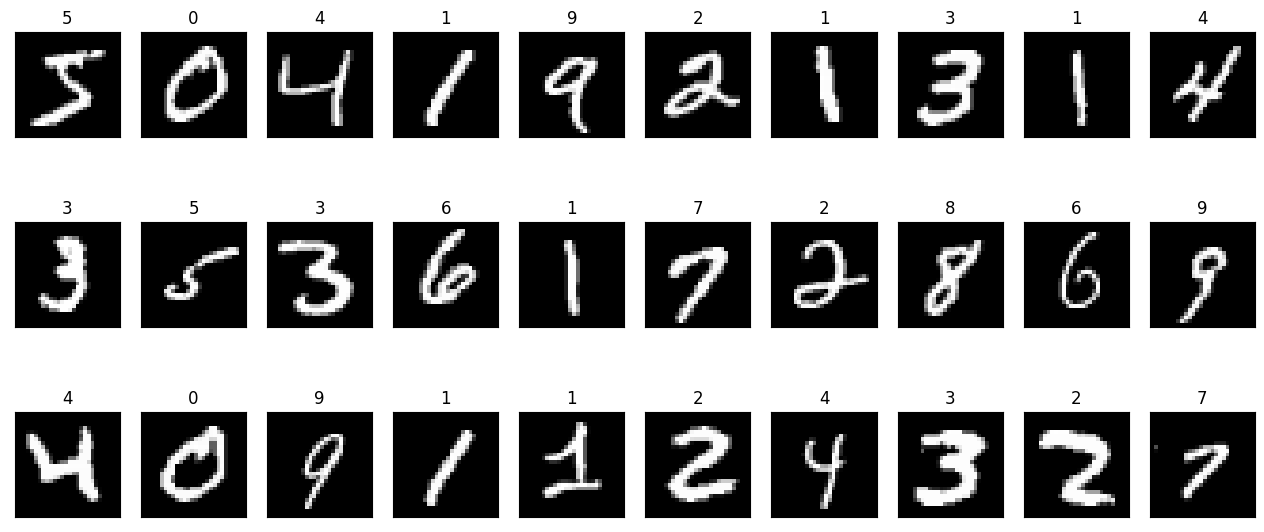

In [25]:
# presenting some digits

n1=0
n2=30
plt.gray()
fig = plt.figure( figsize=(16,7) )
for k1 in range(n1,n2):
    ax = fig.add_subplot(3,10,k1+1, title=str(int(tar_tr[k1])))
    ax.matshow(inp_tr[k1].reshape((28,28)).astype(float))
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
plt.show()

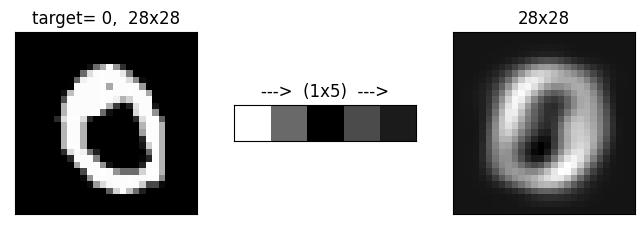

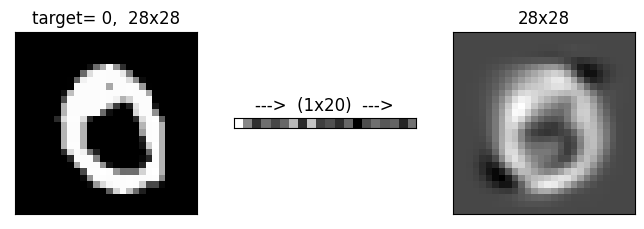

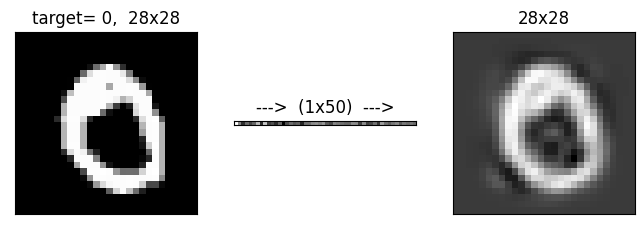

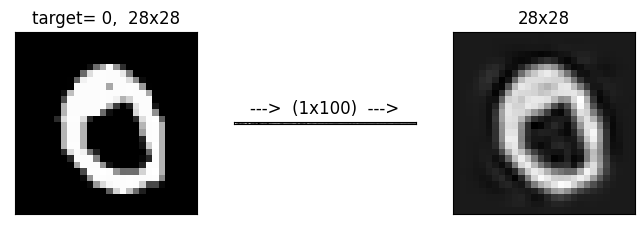

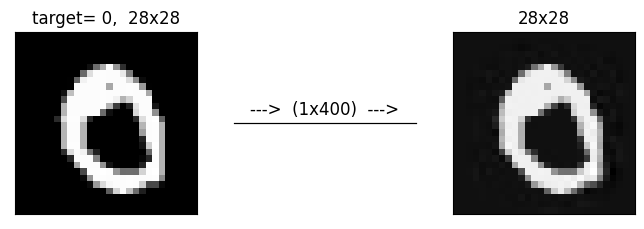

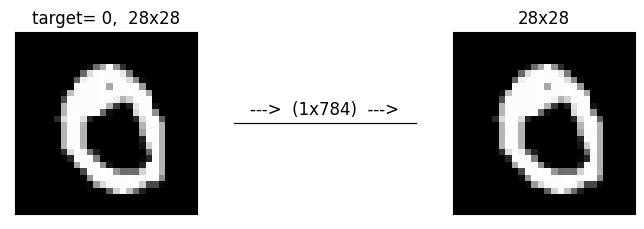

In [26]:
# use the first 5 principle componets to reconstract an image  
# use the first 20 principle componets to reconstract the image
# use ....

n_pic = np.random.choice(np.arange(len(inp_va)))

for kc in [5,20, 50, 100, 400, 784]:
    n_components=kc
    pca=PCA(n_components=n_components)
    #pca = KernelPCA(n_components=kc, kernel="rbf", gamma=1e-3, fit_inverse_transform=True, alpha=5e-3)



    pca.fit(inp_tr)
    inp_tr_pca = pca.transform(inp_tr)
    inp_va_pca = pca.transform(inp_va)

    sx= int(np.sqrt(n_components))
    sy= int(np.sqrt(n_components))
    plt.figure(n_pic, figsize=(8,8))
    approximation = pca.inverse_transform(inp_va_pca[n_pic]) # re-constract the image
    fig = plt.figure(n_pic)
    plt.subplot(1, 3, 1)
    plt.imshow(inp_va[n_pic].reshape(28,28),cmap='gray')
    plt.title('target= '+str(tar_va[n_pic])+',  28x28')
    plt.xticks([])
    plt.yticks([])
    plt.subplot(1, 3, 2)
    plt.imshow(inp_va_pca[n_pic].reshape((-1, n_components)),cmap='gray')
    plt.title('--->  (1x'+str(n_components)+')  --->')
    plt.xticks([])
    plt.yticks([])
    plt.subplot(1, 3, 3)
    plt.imshow(approximation.reshape(28,28),cmap='gray')
    plt.title('28x28')
    plt.xticks([])
    plt.yticks([])




    plt.show()

----------------------------------------------------------
                  5.0 % (of informtion is used)


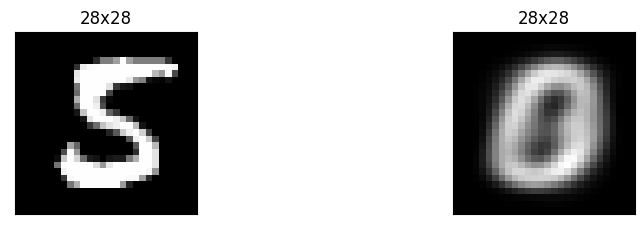

----------------------------------------------------------
                  10.0 % (of informtion is used)


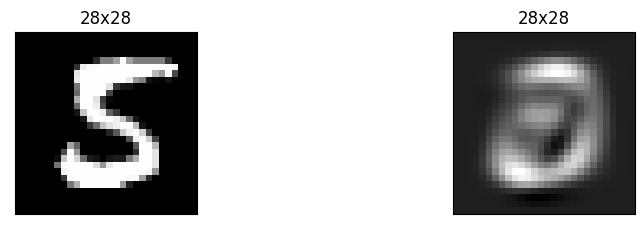

----------------------------------------------------------
                  20.0 % (of informtion is used)


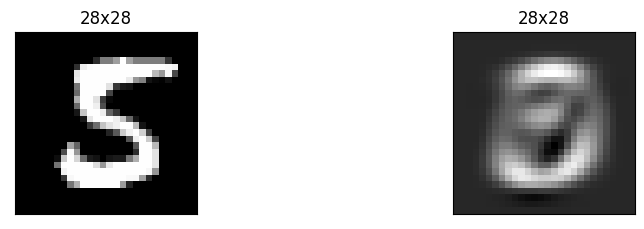

----------------------------------------------------------
                  50.0 % (of informtion is used)


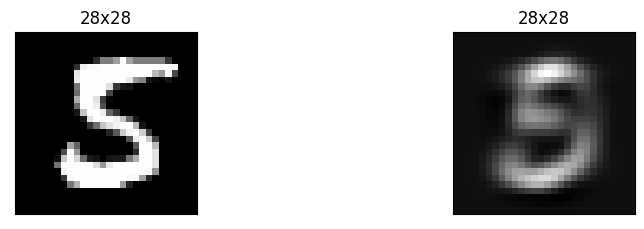

----------------------------------------------------------
                  90.0 % (of informtion is used)


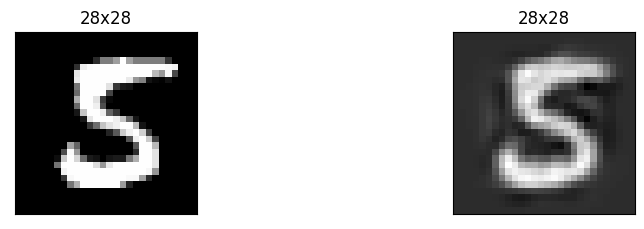

In [27]:
# use the first 5 principle componets to reconstract an image  
# use the first 20 principle componets to reconstract the image
# use ....

n_pic = np.random.choice(np.arange(len(inp_va)))

for kc in [.05,0.10, 0.20, 0.50, 0.90]:
    n_components=kc
    pca=PCA(n_components=n_components)


    pca.fit(inp_tr)
    inp_tr_pca = pca.transform(inp_tr)
    inp_va_pca = pca.transform(inp_va)

    sx= int(np.sqrt(n_components))
    sy= int(np.sqrt(n_components))
    plt.figure(n_pic, figsize=(8,8))
    approximation = pca.inverse_transform(inp_va_pca[n_pic]) # re-constract the image
    fig = plt.figure(n_pic)
    plt.subplot(1, 3, 1)
    plt.imshow(inp_va[n_pic].reshape(28,28),cmap='gray')
    plt.title('28x28')
    plt.xticks([])
    plt.yticks([])
    print('----------------------------------------------------------')
    print ('                 ', str(n_components*100), '% (of informtion is used)')
    plt.subplot(1, 3, 3)
    plt.imshow(approximation.reshape(28,28),cmap='gray')
    plt.title('28x28')
    plt.xticks([])
    plt.yticks([])

    plt.show()

# The cumulative explained variance shows the accumulation of variance for each principal component number. The individual explained variance describes the variance of each principal component.

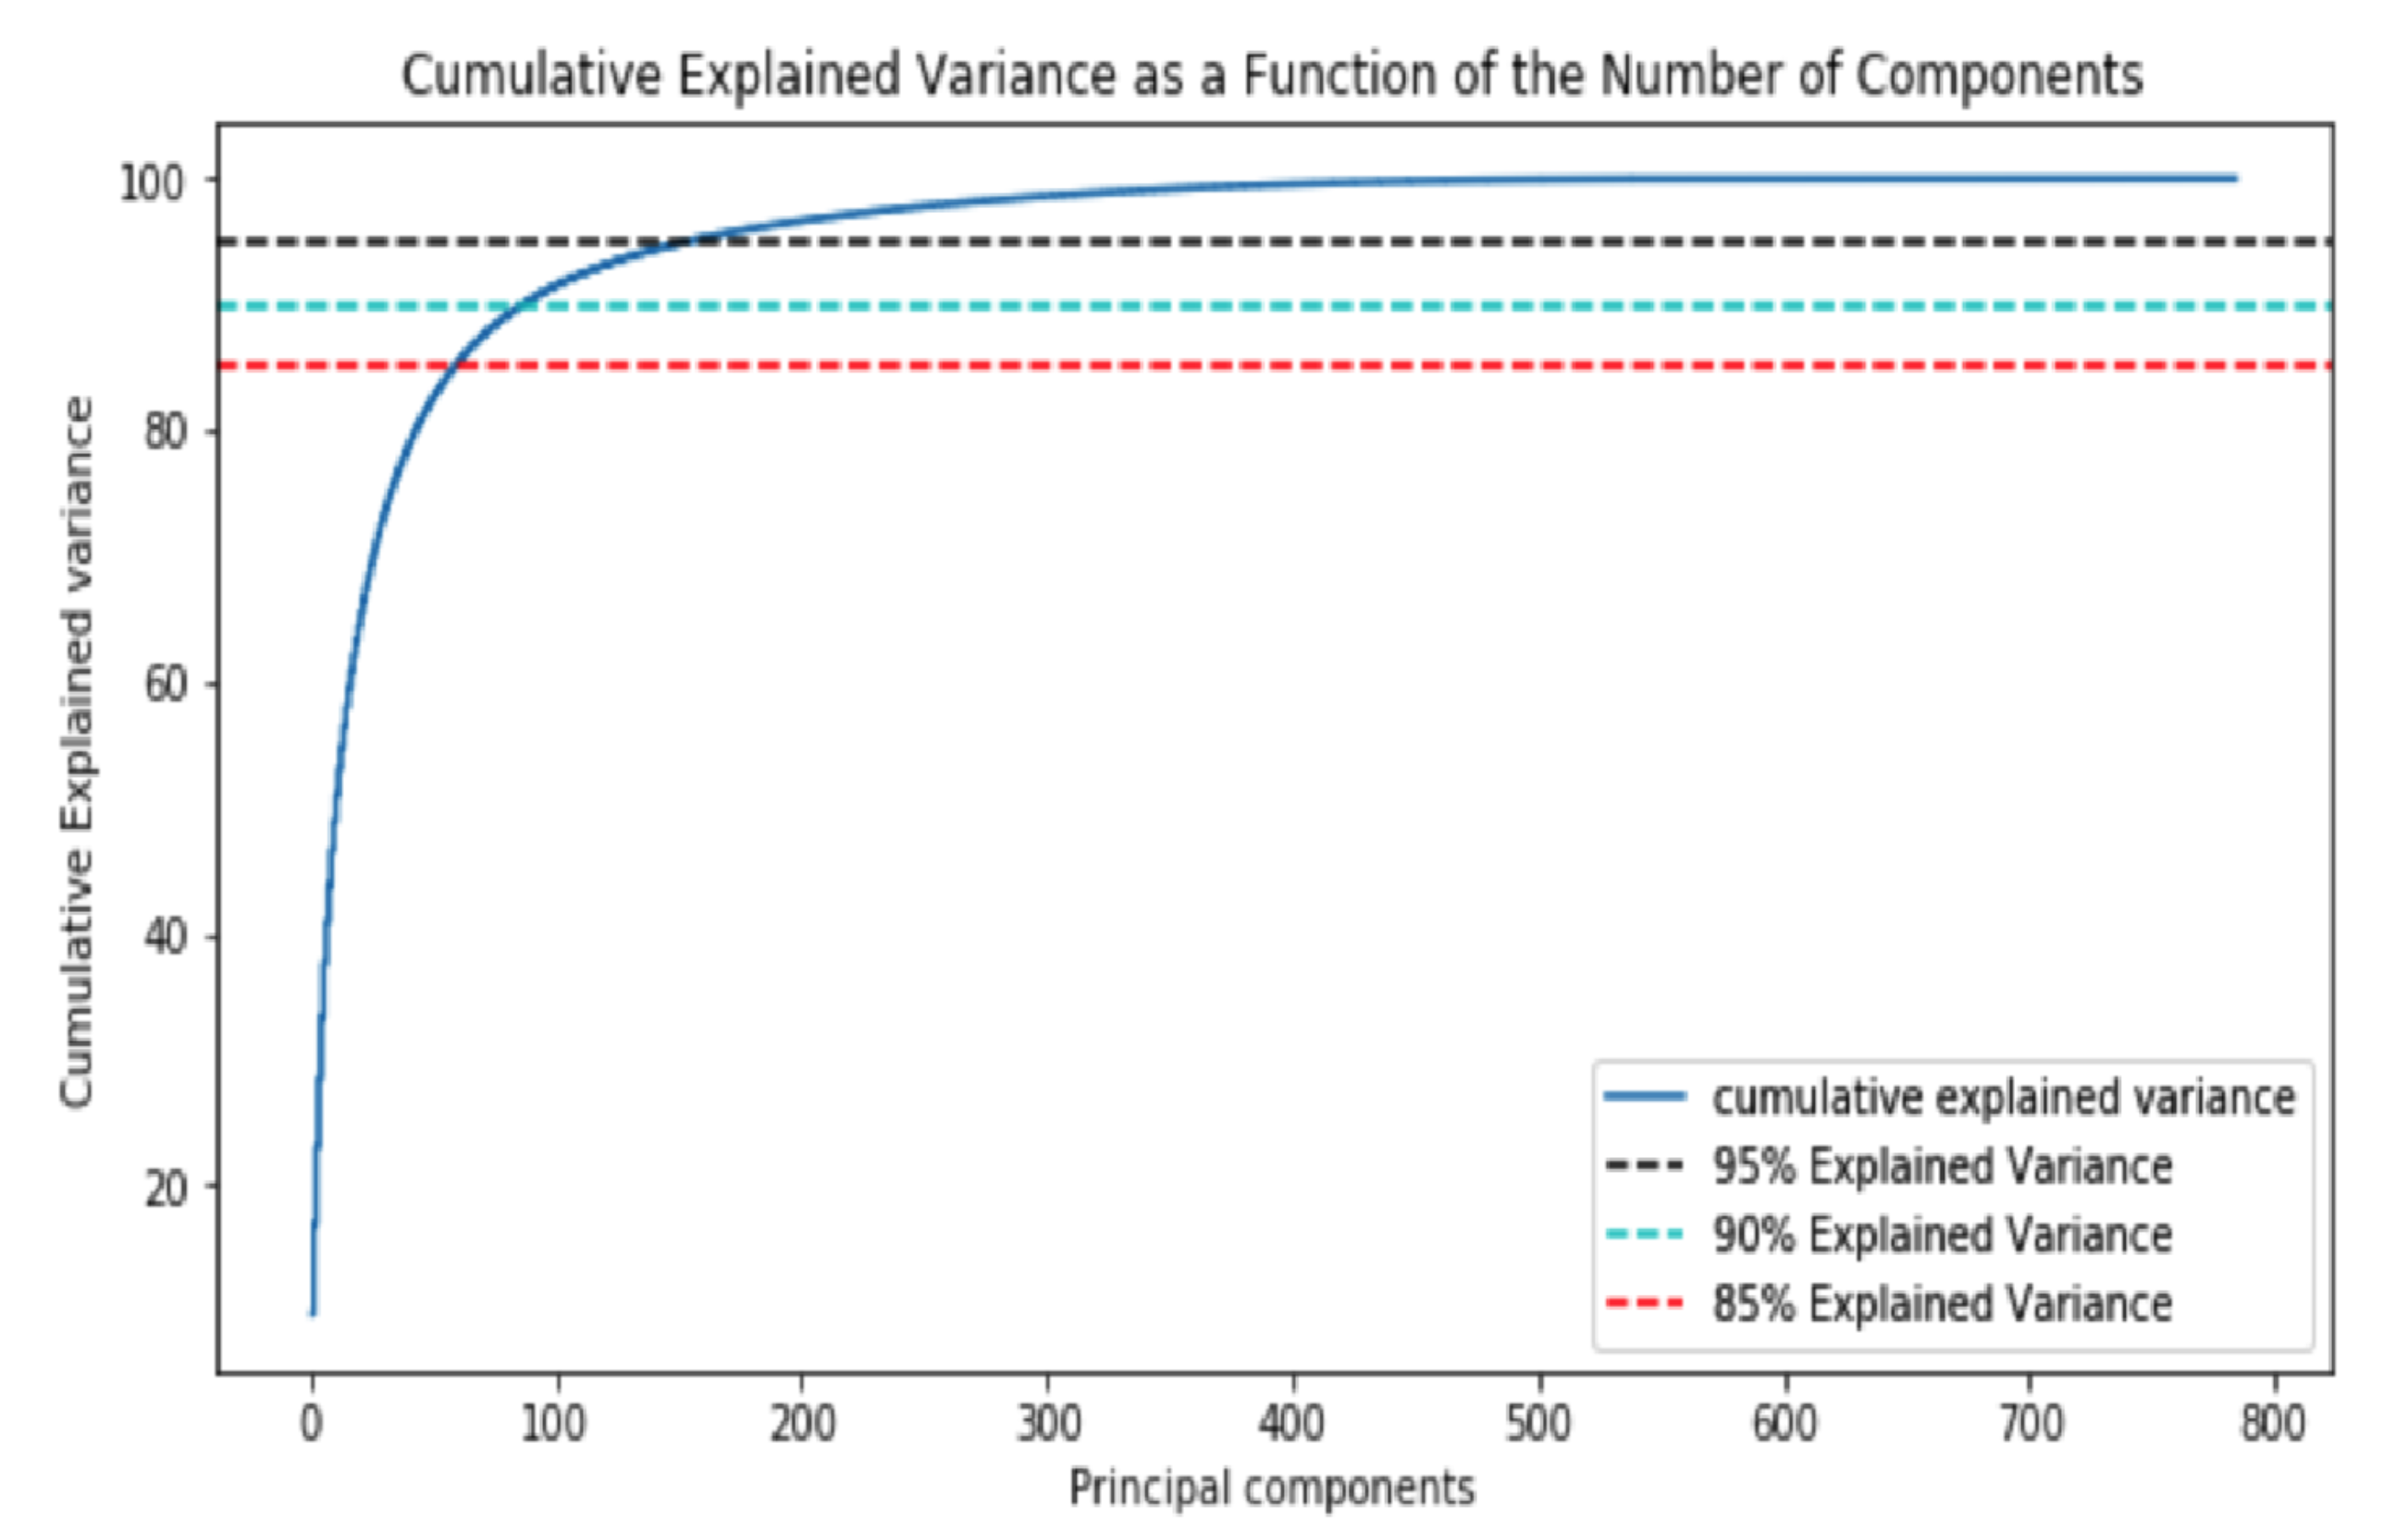

In [28]:
# Choose the maximum components you have in your data set (Here for MNIST data" 784):
pca=PCA(n_components=784)  # define the model and choose n
pca.fit(inp_tr)  # train the model


PCA(n_components=784)

In [29]:
EV= pca.explained_variance_  #Estimate "explained_variance", i.e., the variance of the first principal component to the end ...
EV[0:10]  # show the first 10 results

array([5.11687301, 3.74139084, 3.25270845, 2.8416207 , 2.56711774,
       2.27366339, 1.72515498, 1.52056024, 1.45630525, 1.24275009])

In [30]:
CEV=pca.explained_variance_ratio_    #  estimate "explained_variance_ratio" from the trained model
CEV[0:10]  # show the first 10 results

array([0.09704664, 0.07095924, 0.06169089, 0.05389419, 0.04868797,
       0.04312231, 0.0327193 , 0.02883895, 0.02762029, 0.02357001])

Text(0.5, 0, 'Principal Components')

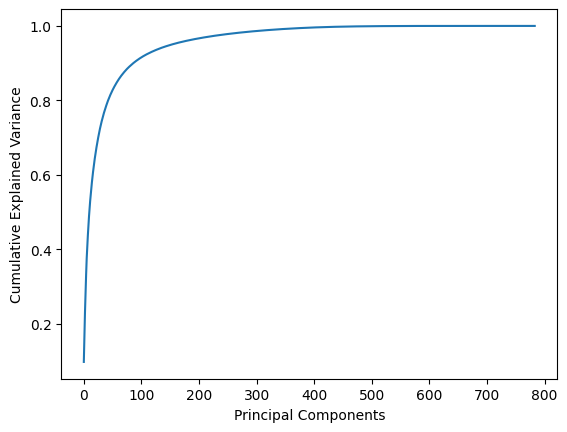

In [31]:
plt.plot(np.cumsum(CEV))
plt.ylabel('Cumulative Explained Variance')
plt.xlabel('Principal Components')
